In [56]:
# PROBLEM 1
#
# Linear arrangement of variables: 4!
# Arrangement of operators: 3!
#
# ANSWER: 4! * 3! = 24 * 6 = 144

In [57]:
# PROBLEM 2
#
# Write a plot function to save a .PNG file named `filename` 

In [58]:
# Import the required libraries
import sklearn.neural_network as nn
import numpy.random as random
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [59]:
# METHOD: Generate data given N number of data points
def generate_data(N):
    g = 8.9

    Ts = random.rand(N)
    Hs = g*(Ts**2)/2
    
    return Ts, Hs

Ts, Hs = generate_data(100) # Update size of data here

In [60]:
# METHOD: Test the neural network
def test_NN(Ts, Hs, max_iter=200):
    NN = nn.MLPRegressor(
        hidden_layer_sizes=(4,4), 
        activation='tanh', 
        max_iter=max_iter
        )
    Ts = Ts.reshape(-1, 1)
    NN.fit(Ts, Hs)
    # predictions = NN.predict(Ts)
    score = NN.score(Ts, Hs)

    return score

In [61]:
# EXECUTION: Test the test_NN function with specified number of iterations
max_iter = 200 # number of iterations
test_NN(Ts, Hs, max_iter)

0.28249503930760766

In [68]:
# ANSWER: Generate the PNG file of the plot
#
# @params: X - A 1-D numpy array
# @params: Y - A 1-D numpy array
# @params: filename - A string to name the output file
def learning_curve(x, y, filename):
    # 1. Scan the maximal number of iterations from 50 to 2,000 with a step of 50 while logging the corresponding score sequentially (the return of test_NN)
    max_iters = np.array([]) # array of 50 - 2000 with iteration of 50
    t_score = np.array([]) # training score
    for i in range(50, 2050, 50):
        max_iters = np.append(max_iters, i)
        t_score = np.append(t_score, test_NN(x, y, i))
    print(max_iters)
    print(t_score)

    #  2. Make a line plot between the maximal number of iterations and the score of the NN, and save as a PNG file.
    figure = plt.figure(figsize=(10, 10))
    plt.title("Training score as a function of # iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Training Score")
    plt.plot(max_iters, t_score)
    plt.grid()
    plt.show()
    figure.savefig(filename + ".png")

    # 3. Return the two vectors (as 1-D numpy array or 1-D list) used for plotting (first the sequence of maximal numbers of iterations, and then the scores).
    return np.vstack((max_iters, t_score))

[  50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.  600.
  650.  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150. 1200.
 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750. 1800.
 1850. 1900. 1950. 2000.]
[-1.01065343 -0.01080418 -1.03205564 -0.17558941  0.17663404  0.20400311
 -0.07148044 -0.02602788 -0.03326332  0.20326314  0.08240689  0.20432619
  0.17442898  0.16742784  0.13451554  0.16335526  0.1845421   0.09995989
  0.20368837  0.20646936  0.19979009  0.19810281  0.19628729  0.20008218
  0.19856262  0.19825703  0.20573359  0.20725111  0.20246392  0.16428661
  0.19647703  0.00127351  0.19613239  0.2017484   0.20079394  0.19623333
  0.20040403  0.20487679  0.17888135  0.19493779]


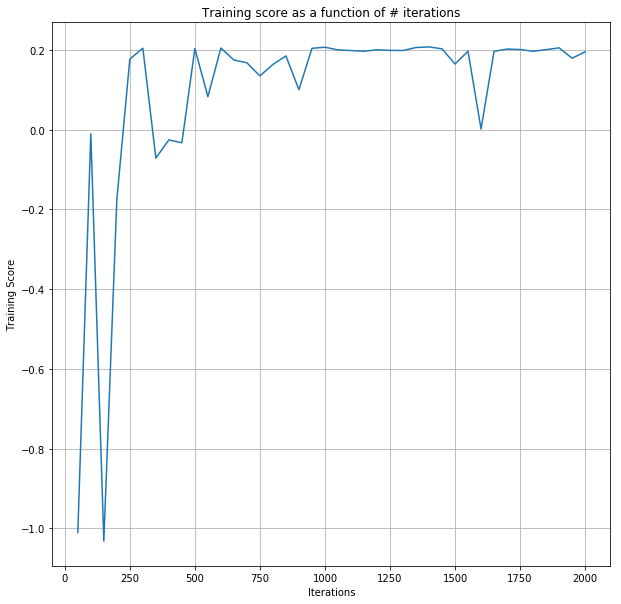

array([[ 5.00000000e+01,  1.00000000e+02,  1.50000000e+02,
         2.00000000e+02,  2.50000000e+02,  3.00000000e+02,
         3.50000000e+02,  4.00000000e+02,  4.50000000e+02,
         5.00000000e+02,  5.50000000e+02,  6.00000000e+02,
         6.50000000e+02,  7.00000000e+02,  7.50000000e+02,
         8.00000000e+02,  8.50000000e+02,  9.00000000e+02,
         9.50000000e+02,  1.00000000e+03,  1.05000000e+03,
         1.10000000e+03,  1.15000000e+03,  1.20000000e+03,
         1.25000000e+03,  1.30000000e+03,  1.35000000e+03,
         1.40000000e+03,  1.45000000e+03,  1.50000000e+03,
         1.55000000e+03,  1.60000000e+03,  1.65000000e+03,
         1.70000000e+03,  1.75000000e+03,  1.80000000e+03,
         1.85000000e+03,  1.90000000e+03,  1.95000000e+03,
         2.00000000e+03],
       [-1.01065343e+00, -1.08041778e-02, -1.03205564e+00,
        -1.75589410e-01,  1.76634044e-01,  2.04003114e-01,
        -7.14804352e-02, -2.60278824e-02, -3.32633224e-02,
         2.03263141e-01,  8.24

In [69]:
# The Training Data
noftrainingdata=100
sigma_noise=1


x=np.linspace(0.05,0.95,noftrainingdata)
# Gaussian random noise
s = sigma_noise*np.random.randn(noftrainingdata)

#linear model of training data with or without noise
y = 2 * x + s
#y = 2 * x

filename = "test"
learning_curve(x, y, filename)